<h1> Seattle AirBnB Open Data

<h2> by Arushi Chawla

> This data has been taken from Kaggle and it gives us a sneak peek into the Airbnb activity in Seattle. In this project, we will look through this data and try to identify .........
- Year price trend
- Availability impacting the price of same listing 
- high prices house features, high review house features?


In [30]:
# import packages and set  plot to be embedded
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

# To display all columns and rows
pd.options.display.max_columns = None
pd.options.display.max_rows = None

<h2> Data Gathering

> In this section, we will be reading 3 .csv files that have been downloaded to our local machine from https://www.kaggle.com/airbnb/seattle/data#calendar.csv 

In [10]:
# Read all data files
calendar = pd.read_csv("calendar.csv")
listings = pd.read_csv("listings.csv")
reviews = pd.read_csv("reviews.csv")

In [50]:
#Look through the different data files

In [11]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [14]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [31]:
#cols = listing.columns.tolist()
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [87]:
listings.experiences_offered.unique()
listings.host_response_time.unique()

array(['within a few hours', 'within an hour', nan, 'within a day',
       'a few days or more'], dtype=object)

In [15]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [13]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [16]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


<h2> Data Cleaning

 > Check for data anomalies including but not limiting to nulls, appropriate column data type etc.

In [34]:
# Create copy of original dataframes
cal = calendar.copy()
lis = listings.copy()
rev = reviews.copy()

In [38]:
# Drop nulls in column price since any kind of imputation may not be best here
print(len(cal))
cal.dropna(subset=['price'], inplace=True)

#validating
print(len(cal))

1393570
934542


In [42]:
# Fix datatypes for certain columns 
cal['date'] = pd.to_datetime(cal['date'])

In [ ]:
# Strip off '$' from price since all are dollar and we need to analyze price as a number
cal['price'] = cal['price'].str[1:]

# Replace ',' from the price and then convert it to float
cal['price'] = cal['price'].apply(lambda x: float(x.split()[0].replace(',', '')))

In [119]:
# Drop columns not relevant to our analyses
col = ['summary','name','space','description','experiences_offered','neighborhood_overview','notes','transit', \
       'thumbnail_url','medium_url','picture_url','xl_picture_url','host_url','host_about','host_thumbnail_url',\
       'host_picture_url','street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', \
       'latitude', 'longitude', 'square_feet', 'calendar_updated','license', 'weekly_price', 'monthly_price']

lis.drop(col, axis =1, inplace=True)

KeyError: "['summary' 'name' 'space' 'description' 'experiences_offered'\n 'neighborhood_overview' 'notes' 'transit' 'thumbnail_url' 'medium_url'\n 'picture_url' 'xl_picture_url' 'host_url' 'host_about'\n 'host_thumbnail_url' 'host_picture_url' 'street' 'neighbourhood'\n 'neighbourhood_cleansed' 'neighbourhood_group_cleansed' 'latitude'\n 'longitude' 'square_feet' 'calendar_updated' 'license' 'weekly_price'\n 'monthly_price'] not found in axis"

In [120]:
#lis.drop([], axis =1, inplace=True)

In [117]:
# Rename columns
col = {'market': 'city',
       'extra_people' : 'extra_people_price'}
lis.rename(columns=col, inplace=True)

In [88]:
# Strip off '$' from all the price columns since all are dollar and we need to analyze price as a number
lis['price'] = lis['price'].str[1:]
lis['extra_people'] = lis['extra_people'].str[1:]
lis['security_deposit'] = lis['security_deposit'].str[1:]

# Replace ',' from the price and then convert it to float
lis['price'] = lis['price'].apply(lambda x: float(x.split()[0].replace(',', '')))
lis['extra_people_price'] = lis['extra_people_price'].apply(lambda x: float(x.split()[0].replace(',', '')))

In [101]:
# 
lis['security_deposit'].value_counts().sort_values()
#figure out security deposit

$149.00        1
$134.00        1
$220.00        1
$225.00        1
$499.00        1
$399.00        1
$780.00        1
$375.00        1
$195.00        1
$185.00        1
$115.00        1
$180.00        1
$449.00        1
$360.00        1
$5,000.00      1
$109.00        1
$1,900.00      1
$650.00        1
$140.00        1
$1,200.00      2
$550.00        2
$295.00        3
$199.00        3
$120.00        3
$995.00        3
$2,000.00      4
$2,500.00      5
$700.00        5
$450.00        5
$99.00         5
$175.00        9
$600.00        9
$800.00       10
$1,500.00     11
$125.00       12
$750.00       14
$1,000.00     29
$400.00       49
$95.00        66
$350.00       79
$150.00      191
$500.00      230
$250.00      232
$300.00      235
$200.00      283
$100.00      348
Name: security_deposit, dtype: int64

In [110]:
lis[lis['security_deposit'] == "$2,500.00"]

,id,listing_url,scrape_id,last_scraped,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,city,state,zipcode,market,smart_location,country_code,country,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
641,7717813,https://www.airbnb.com/rooms/7717813,20160104002432,2016-01-04,40550531,Kim,2015-08-05,US,within an hour,100%,100%,f,Madrona,1.0,1.0,"['email', 'phone', 'google', 'reviews', 'jumio']",t,t,Seattle,WA,98122,Seattle,"Seattle, WA",US,United States,t,House,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",130.0,950.00,"3,000.00","$2,500.00",$75.00,4,0.0,2,1125,t,23,53,83,358,2016-01-04,13,2015-08-08,2015-12-30,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,WASHINGTON,f,strict,f,f,1,2.60
1901,8631419,https://www.airbnb.com/rooms/8631419,20160104002432,2016-01-04,35332502,Ian,2015-06-08,"Seattle, Washington, United States",within an hour,100%,100%,f,Genesee,2.0,2.0,"['email', 'phone', 'facebook', 'google', 'revi...",t,t,Seattle,WA,98116,Seattle,"Seattle, WA",US,United States,t,House,Entire home/apt,7,2.5,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",180.0,"1,350.00","4,400.00","$2,500.00",$10.00,1,0.0,2,365,t,27,57,84,166,2016-01-04,3,2015-11-29,2015-12-30,93.0,10.0,8.0,10.0,10.0,10.0,9.0,f,WASHINGTON,f,flexible,f,f,2,2.43
2763,872152,https://www.airbnb.com/rooms/872152,20160104002432,2016-01-04,50893,Chris,2009-11-02,"Seattle, Washington, United States",within a few hours,100%,100%,f,Capitol Hill,10.0,10.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,Seattle,WA,98102,Seattle,"Seattle, WA",US,United States,t,House,Entire home/apt,4,2.5,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",182.0,"1,311.00","3,200.00","$2,500.00",$300.00,4,20.0,3,1125,t,0,2,5,280,2016-01-04,10,2014-03-27,2015-09-06,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,WASHINGTON,f,strict,t,t,9,0.46
2824,13068,https://www.airbnb.com/rooms/13068,20160104002432,2016-01-04,50893,Chris,2009-11-02,"Seattle, Washington, United States",within a few hours,100%,100%,f,Capitol Hill,10.0,10.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,Seattle,WA,98102,Seattle,"Seattle, WA",US,United States,t,House,Entire home/apt,10,2.0,3.0,5.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",360.0,"2,700.00","6,850.00","$2,500.00",$300.00,8,35.0,3,365,t,26,56,86,344,2016-01-04,26,2012-10-21,2015-12-15,93.0,9.0,9.0,10.0,9.0,10.0,9.0,f,WASHINGTON,f,strict,t,t,9,0.67
2868,384797,https://www.airbnb.com/rooms/384797,20160104002432,2016-01-04,50893,Chris,2009-11-02,"Seattle, Washington, United States",within a few hours,100%,100%,f,Capitol Hill,10.0,10.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,Seattle,WA,98102,Seattle,"Seattle, WA",US,United States,t,House,Entire home/apt,16,2.0,6.0,9.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Pets...",673.0,"3,600.00",NaN,"$2,500.00",$300.00,13,68.0,3,60,t,18,48,74,320,2016-01-04,21,2012-05-23,2015-09-03,97.0,9.0,10.0,10.0,10.0,10.0,9.0,f,WASHINGTON,f,strict,t,t,9,0.48


In [68]:
# Drop null review since that is the key column in this table and can't be imputed; also null values are only a few 
rev.dropna(subset=['comments'], inplace=True)

In [71]:
# Fix datatypes for certain columns 
rev['date'] = pd.to_datetime(rev['date'])

<h2> Data Validation

In [65]:
cal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934542 entries, 0 to 1393213
Data columns (total 4 columns):
listing_id    934542 non-null int64
date          934542 non-null datetime64[ns]
available     934542 non-null object
price         934542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 35.6+ MB


In [64]:
cal.tail()

,listing_id,date,available,price
1393207,10208623,2016-01-06,t,87.0
1393208,10208623,2016-01-07,t,87.0
1393211,10208623,2016-01-10,t,87.0
1393212,10208623,2016-01-11,t,87.0
1393213,10208623,2016-01-12,t,87.0


In [121]:
lis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 65 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
host_id                             3818 non-null int64
host_name                           3816 non-null object
host_since                          3816 non-null object
host_location                       3810 non-null object
host_response_time                  3295 non-null object
host_response_rate                  3295 non-null object
host_acceptance_rate                3045 non-null object
host_is_superhost                   3816 non-null object
host_neighbourhood                  3518 non-null object
host_listings_count                 3816 non-null float64
host_total_listings_count           3816 non-null float64
host_verifications                  381

In [95]:
lis.head()

,id,listing_url,scrape_id,last_scraped,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,city,state,zipcode,market,smart_location,country_code,country,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,956883,Maija,2011-08-11,"Seattle, Washington, United States",within a few hours,96%,100%,f,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",85.0,NaN,NaN,NaN,NaN,2,5.0,1,365,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,5177328,Andrea,2013-02-21,"Seattle, Washington, United States",within an hour,98%,100%,t,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",150.0,"1,000.00","3,000.00",$100.00,$40.00,1,0.0,2,90,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,16708587,Jill,2014-06-12,"Seattle, Washington, United States",within a few hours,67%,100%,f,Queen Anne,2.0,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",t,t,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,t,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",975.0,NaN,NaN,"$1,000.00",$300.00,10,25.0,4,30,t,1,6,17,220,2016-01-04,20,2014-07-30,2015-09-03,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,9851441,Emily,2013-11-06,"Seattle, Washington, United States",NaN,NaN,NaN,f,Queen Anne,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,t,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",100.0,650.00,"2,300.00",NaN,NaN,1,0.0,1,1125,t,0,0,0,143,2016-01-04,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,1452570,Emily,2011-11-29,"Seattle, Washington, United States",within an hour,100%,NaN,f,Queen Anne,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,t,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",450.0,NaN,NaN,$700.00,$125.00,6,15.0,1,1125,t,30,60,90,365,2016-01-04,38,2012-07-10,2015-10-24,92.0,9.0,9.0,10.0,10.0,9.0,9.0,f,WASHINGTON,f,strict,f,f,1,0.89


In [97]:
lis.price.describe()

count    3818.000000
mean      127.976166
std        90.250022
min        20.000000
25%        75.000000
50%       100.000000
75%       150.000000
max      1000.000000
Name: price, dtype: float64

In [72]:
rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84831 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84831 non-null int64
id               84831 non-null int64
date             84831 non-null datetime64[ns]
reviewer_id      84831 non-null int64
reviewer_name    84831 non-null object
comments         84831 non-null object
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 4.5+ MB


In [73]:
rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


<h2> Data Exploration

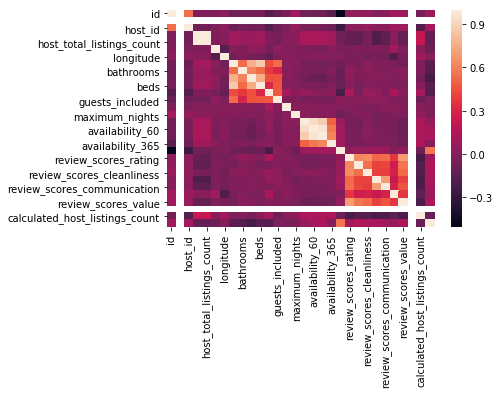

In [27]:
sns.heatmap(listings.corr());